In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

# 1. MinMax scaling & Train-Test-Split 

In [2]:
# load the dataset
df = pd.read_csv('current_infant_brand_clean.csv')
df

,cur_brand,first_buy_brand,babyage,ZONE,enroll_type2,enroll_age,open_rate0,click_rate0,redem_rate0,breastfed,breastfed_and_formula,formula,neither
0,0,0,120,1,1,-247,0.000000,0.000000,0.000000,1,0,0,0
1,1,1,150,1,1,-169,0.052632,0.000000,0.600000,0,0,1,0
2,0,0,330,1,1,-64,0.714286,0.285714,0.000000,0,1,0,0
3,1,1,60,1,0,-31,0.911765,0.205882,0.666667,0,1,0,0
4,1,1,30,1,1,9,0.250000,0.071429,0.250000,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12888,1,0,180,0,1,-39,0.289474,0.105263,0.000000,0,1,0,0
12889,1,1,0,1,0,-241,0.782609,0.043478,0.500000,0,0,1,0
12890,1,0,30,1,1,-128,0.271186,0.050847,0.500000,0,1,0,0
12891,1,1,30,1,1,-37,0.210526,0.078947,0.000000,0,1,0,0


In [3]:
# scale the data
scaler = MinMaxScaler()
scaler.fit(df)
scaler.transform(df)
df1 = pd.DataFrame(scaler.transform(df))
df1.columns = df.columns
df1

,cur_brand,first_buy_brand,babyage,ZONE,enroll_type2,enroll_age,open_rate0,click_rate0,redem_rate0,breastfed,breastfed_and_formula,formula,neither
0,0.0,0.0,0.333333,1.0,1.0,0.487926,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0
1,1.0,1.0,0.416667,1.0,1.0,0.496372,0.052632,0.000000,0.600000,0.0,0.0,1.0,0.0
2,0.0,0.0,0.916667,1.0,1.0,0.507742,0.714286,0.285714,0.000000,0.0,1.0,0.0,0.0
3,1.0,1.0,0.166667,1.0,0.0,0.511316,0.911765,0.205882,0.666667,0.0,1.0,0.0,0.0
4,1.0,1.0,0.083333,1.0,1.0,0.515647,0.250000,0.071429,0.250000,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12888,1.0,0.0,0.500000,0.0,1.0,0.510449,0.289474,0.105263,0.000000,0.0,1.0,0.0,0.0
12889,1.0,1.0,0.000000,1.0,0.0,0.488576,0.782609,0.043478,0.500000,0.0,0.0,1.0,0.0
12890,1.0,0.0,0.083333,1.0,1.0,0.500812,0.271186,0.050847,0.500000,0.0,1.0,0.0,0.0
12891,1.0,1.0,0.083333,1.0,1.0,0.510666,0.210526,0.078947,0.000000,0.0,1.0,0.0,0.0


In [4]:
# train test split
# drop the "first_buy_brand since" it is highly correlated to cur_brand

df_x = df1.drop(columns= ['cur_brand','first_buy_brand'])
X_train, X_test, y_train, y_test = train_test_split(df_x, 
                                                   df1['cur_brand'],
                                                    test_size = 0.2,
                                                    stratify=df1['cur_brand'], 
                                                    random_state=0)

# 2. Upsampling

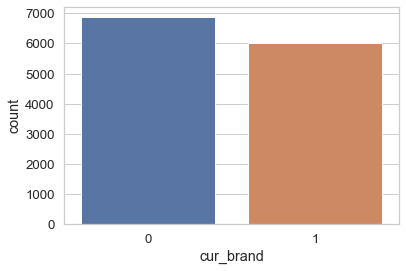

In [5]:
# dependent variable: current brand
ax = sns.countplot(x="cur_brand", data=df)

In [6]:
# Returning to one dataframe
training_set = pd.concat([X_train, y_train], axis=1)

# Separating classes
our_brand = training_set[training_set.cur_brand == 1]
not_our_brand = training_set[training_set.cur_brand == 0]

In [7]:
# Oversampling the minority
oversample = resample(our_brand, 
                       replace=True, 
                       n_samples=len(not_our_brand), #set the number of samples to equal the number of the majority class
                       random_state=0)

# Returning to new training set
oversample_train = pd.concat([not_our_brand, oversample])
oversample_train.cur_brand.value_counts(normalize=True)

0.0    0.5
1.0    0.5
Name: cur_brand, dtype: float64

In [8]:
oversample_train

,babyage,ZONE,enroll_type2,enroll_age,open_rate0,click_rate0,redem_rate0,breastfed,breastfed_and_formula,formula,neither,cur_brand
4965,0.916667,1.0,0.0,0.497130,0.000000,0.000000,0.142857,0.0,1.0,0.0,0.0,0.0
2214,0.166667,0.0,1.0,0.472983,0.026087,0.000000,0.250000,0.0,1.0,0.0,0.0,0.0
6208,0.333333,1.0,0.0,0.488793,0.173913,0.021739,0.090909,0.0,1.0,0.0,0.0,0.0
10460,0.083333,1.0,0.0,0.491391,0.750000,0.138889,0.000000,0.0,1.0,0.0,0.0,0.0
2909,0.916667,1.0,1.0,0.500162,0.040000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4316,0.750000,1.0,1.0,0.515106,0.000000,0.000000,0.333333,0.0,1.0,0.0,0.0,1.0
3508,0.083333,1.0,1.0,0.542610,0.444444,0.074074,0.400000,0.0,1.0,0.0,0.0,1.0
5898,0.916667,0.0,1.0,0.491933,0.237288,0.016949,0.000000,0.0,1.0,0.0,0.0,1.0
527,1.000000,1.0,1.0,0.489875,0.031579,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0


In [9]:
# Separate oversampled data into X and y sets
oversample_X_train = oversample_train.drop('cur_brand', axis=1)
oversample_y_train = oversample_train.cur_brand

# 3. Modeling

## 3.1 Logistic Regression

### 3.1.1 Fit the default model

In [10]:
clf_lr = LogisticRegression()

# cross validation
scores = cross_val_score(clf_lr, oversample_X_train, oversample_y_train, scoring='accuracy', cv=5)
print(scores)

# make cross validated predictions
y_pred = cross_val_predict(clf_lr, oversample_X_train, oversample_y_train, cv=5)
print(r2_score(oversample_y_train, y_pred))
print("%0.4f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.61363636 0.62454545 0.63181818 0.62528422 0.63028649]
-0.4995453718857974
0.6251 accuracy with a standard deviation of 0.01


In [11]:
clf_lr.fit(oversample_X_train, oversample_y_train)
# predict 
y_pred_lr = clf_lr.predict(X_test)
print(metrics.classification_report(y_true=y_test, y_pred=y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.65      0.65      0.65      1375
         1.0       0.60      0.60      0.60      1204

    accuracy                           0.63      2579
   macro avg       0.62      0.62      0.62      2579
weighted avg       0.63      0.63      0.63      2579



###  3.1.2 Grid Search (hyperparameter tuning)

In [12]:
clr_lr = LogisticRegression()

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,500,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

clf_lr = GridSearchCV(clr_lr, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# fit the data
clf_lr.fit(oversample_X_train, oversample_y_train)
clf_lr.best_params_

Fitting 3 folds for each of 120 candidates, totalling 360 fits


{'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [13]:
# apply the best set of parameters
clf_lr = LogisticRegression(penalty=clf_lr.best_params_['penalty'], C=clf_lr.best_params_['C'],
                           max_iter =clf_lr.best_params_['max_iter'], solver =clf_lr.best_params_['solver'])
    
# fit and predict
clf_lr.fit(oversample_X_train, oversample_y_train)
y_pred_lr = clf_lr.predict(X_test)

# accuracy
print("accuracy: ", metrics.accuracy_score(y_test, y_pred_lr))

accuracy:  0.6320279177975959


### 3.1.3 Confusion Matrix

[[911 464]
 [485 719]]


<AxesSubplot:>

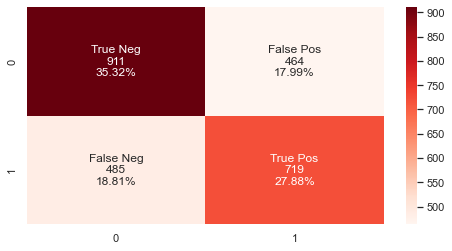

In [14]:
# get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_lr)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(rc={'figure.figsize':(8,4)})
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

## 3.2 Naive Bayes

### 3.2.1 Fit the default model

In [15]:
clf_nb = GaussianNB()

# cross validation
scores = cross_val_score(clf_nb, oversample_X_train, oversample_y_train, scoring='accuracy', cv=5)
print(scores)

# make cross validated predictions
y_pred = cross_val_predict(clf_nb, oversample_X_train, oversample_y_train, cv=5)
print(r2_score(oversample_y_train, y_pred))
print("%0.4f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.59727273 0.59681818 0.59727273 0.59618008 0.59299682]
-0.6155664666302965
0.5961 accuracy with a standard deviation of 0.00


In [16]:
clf_nb.fit(oversample_X_train, oversample_y_train)
# predict 
y_pred_nb = clf_nb.predict(X_test)
print(metrics.classification_report(y_true=y_test, y_pred=y_pred_nb))

              precision    recall  f1-score   support

         0.0       0.60      0.81      0.69      1375
         1.0       0.64      0.39      0.48      1204

    accuracy                           0.61      2579
   macro avg       0.62      0.60      0.59      2579
weighted avg       0.62      0.61      0.60      2579



###  3.2.2 Grid Search (hyperparameter tuning)

In [17]:
clr_nb = GaussianNB()

param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

clf_nb = GridSearchCV(clr_nb, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# fit the data
clf_nb.fit(oversample_X_train, oversample_y_train)
clf_nb.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'var_smoothing': 0.23101297000831597}

In [18]:
# apply the best set of parameters
clf_nb = GaussianNB(var_smoothing=clf_nb.best_params_['var_smoothing'])
    
# fit and predict
clf_nb.fit(oversample_X_train, oversample_y_train)
y_pred_nb = clf_nb.predict(X_test)

# accuracy
print("accuracy: ", metrics.accuracy_score(y_test, y_pred_nb))

accuracy:  0.6246607212097712


### 3.2.3 Confusion Matrix

[[949 426]
 [542 662]]


<AxesSubplot:>

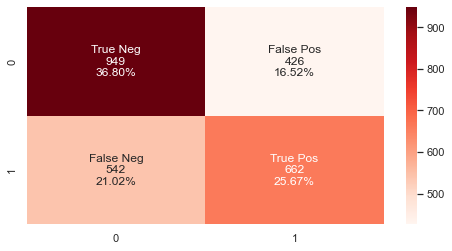

In [19]:
# get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_nb)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(rc={'figure.figsize':(8,4)})
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

## 3.3 KNN

### 3.3.1 Fit the default model

In [20]:
clf_knn = KNeighborsClassifier()

# cross validation
scores = cross_val_score(clf_knn, oversample_X_train, oversample_y_train, scoring='accuracy', cv=5)
print(scores)

# make cross validated predictions
y_pred = cross_val_predict(clf_knn, oversample_X_train, oversample_y_train, cv=5)
print(r2_score(oversample_y_train, y_pred))
print("%0.4f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.62227273 0.64090909 0.66       0.60754889 0.63165075]
-0.4700854700854702
0.6325 accuracy with a standard deviation of 0.02


In [21]:
clf_knn.fit(oversample_X_train, oversample_y_train)
# predict 
y_pred_knn = clf_knn.predict(X_test)
print(metrics.classification_report(y_true=y_test, y_pred=y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.61      0.61      0.61      1375
         1.0       0.56      0.56      0.56      1204

    accuracy                           0.59      2579
   macro avg       0.58      0.58      0.58      2579
weighted avg       0.59      0.59      0.59      2579



### 3.3.2 Grid Search (hyperparameter tuning)

In [22]:
clr_knn = KNeighborsClassifier()

param_grid = {'n_neighbors': list(range(2,16))}

clf_knn = GridSearchCV(clr_knn, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# fit the data
clf_knn.fit(oversample_X_train, oversample_y_train)
clf_knn.best_params_

Fitting 3 folds for each of 14 candidates, totalling 42 fits


{'n_neighbors': 3}

In [23]:
# apply the best set of parameters
clf_knn = KNeighborsClassifier(n_neighbors = clf_knn.best_params_['n_neighbors'])
    
# fit and predict
clf_knn.fit(oversample_X_train, oversample_y_train)
y_pred_knn = clf_knn.predict(X_test)

# accuracy
print("accuracy: ", metrics.accuracy_score(y_test, y_pred_knn))

accuracy:  0.569988367584335


### 3.3.3 Confusion Matrix

[[848 527]
 [582 622]]


<AxesSubplot:>

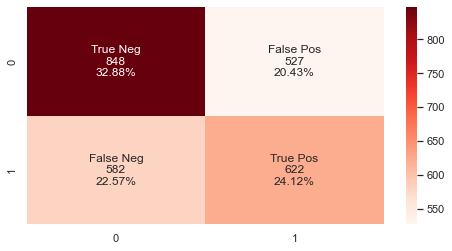

In [24]:
# get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_knn)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(rc={'figure.figsize':(8,4)})
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

## 3.4 SVC

### 3.4.1 Fit the default model

In [25]:
clf_svc = SVC()

# cross validation
scores = cross_val_score(clf_svc, oversample_X_train, oversample_y_train, scoring='accuracy', cv=5)
print(scores)

# make cross validated predictions
y_pred = cross_val_predict(clf_svc, oversample_X_train, oversample_y_train, cv=5)
print(r2_score(oversample_y_train, y_pred))
print("%0.4f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.61363636 0.60636364 0.61454545 0.61800819 0.61937244]
-0.5424622658665212
0.6144 accuracy with a standard deviation of 0.00


In [26]:
clf_svc.fit(oversample_X_train, oversample_y_train)
# predict 
y_pred_svc = clf_svc.predict(X_test)
print(metrics.classification_report(y_true=y_test, y_pred=y_pred_svc))

              precision    recall  f1-score   support

         0.0       0.65      0.66      0.66      1375
         1.0       0.61      0.60      0.60      1204

    accuracy                           0.63      2579
   macro avg       0.63      0.63      0.63      2579
weighted avg       0.63      0.63      0.63      2579



### 3.4.2 Grid Search (hyperparameter tuning)

In [27]:
clr_svc = SVC()

param_grid =  {'C': [ 0.1, 1, 10], 'kernel': ['rbf', 'linear' ], 'gamma': [ 1e-3, 1e-4 ] }

clf_svc = GridSearchCV(clr_svc, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# fit the data
clf_svc.fit(oversample_X_train, oversample_y_train)
clf_svc.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}

In [28]:
# apply the best set of parameters
clf_svc = SVC(C = clf_svc.best_params_['C'], gamma = clf_svc.best_params_['gamma'], 
              kernel = clf_svc.best_params_['kernel'])
    
# fit and predict
clf_svc.fit(oversample_X_train, oversample_y_train)
y_pred_svc = clf_svc.predict(X_test)

# accuracy
print("accuracy: ", metrics.accuracy_score(y_test, y_pred_svc))

accuracy:  0.6359053896859248


### 3.4.3 Confusion Matrix

[[956 419]
 [520 684]]


<AxesSubplot:>

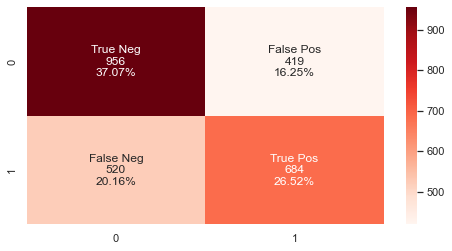

In [29]:
# get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_svc)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(rc={'figure.figsize':(8,4)})
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

## 3.5 Decision Tree

### 3.5.1 Fit the default model

In [30]:
clf_dt = DecisionTreeClassifier()

# cross validation
scores = cross_val_score(clf_dt, oversample_X_train, oversample_y_train, scoring='accuracy', cv=5)
print(scores)

# make cross validated predictions
y_pred = cross_val_predict(clf_dt, oversample_X_train, oversample_y_train, cv=5)
print(r2_score(oversample_y_train, y_pred))
print("%0.4f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.70454545 0.71090909 0.70818182 0.71623465 0.72305593]
-0.14711765775595564
0.7126 accuracy with a standard deviation of 0.01


In [31]:
clf_dt.fit(oversample_X_train, oversample_y_train)
# predict 
y_pred_dt = clf_dt.predict(X_test)
print(metrics.classification_report(y_true=y_test, y_pred=y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.59      0.70      0.64      1375
         1.0       0.56      0.45      0.50      1204

    accuracy                           0.58      2579
   macro avg       0.58      0.57      0.57      2579
weighted avg       0.58      0.58      0.57      2579



### 3.5.2 Grid Search (hyperparameter tuning)

In [32]:
clr_dt = DecisionTreeClassifier()

param_grid =  {'criterion': ['entropy', 'gini'], 'max_depth': range(4,10), 'min_samples_leaf': range(2,5)}

clf_dt = GridSearchCV(clr_dt, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# fit the data
clf_dt.fit(oversample_X_train, oversample_y_train)
clf_dt.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 3}

In [33]:
# apply the best set of parameters
clf_dt = DecisionTreeClassifier(criterion = clf_dt.best_params_['criterion'], 
                                max_depth = clf_dt.best_params_['max_depth'],
                                min_samples_leaf = clf_dt.best_params_['min_samples_leaf'])
    
# fit and predict
clf_dt.fit(oversample_X_train, oversample_y_train)
y_pred_dt = clf_dt.predict(X_test)

# accuracy
print("accuracy: ", metrics.accuracy_score(y_test, y_pred_dt))

accuracy:  0.6172935246219465


### 3.5.3 Confusion Matrix

[[973 402]
 [585 619]]


<AxesSubplot:>

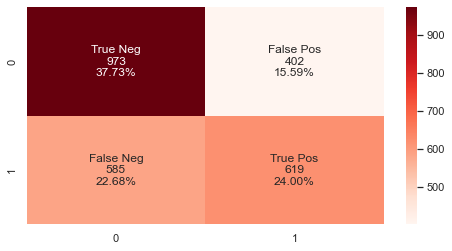

In [34]:
# get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_dt)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(rc={'figure.figsize':(8,4)})
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

## 3.6 Random Forest

### 3.6.1 Fit the default model

In [35]:
clf_rf = RandomForestClassifier()

# cross validation
scores = cross_val_score(clf_rf, oversample_X_train, oversample_y_train, scoring='accuracy', cv=5)
print(scores)

# make cross validated predictions
y_pred = cross_val_predict(clf_rf, oversample_X_train, oversample_y_train, cv=5)
print(r2_score(oversample_y_train, y_pred))
print("%0.4f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.74409091 0.77727273 0.77       0.76261937 0.76671214]
0.05873795235497359
0.7641 accuracy with a standard deviation of 0.01


In [36]:
clf_rf.fit(oversample_X_train, oversample_y_train)
# predict 
y_pred_rf = clf_rf.predict(X_test)
print(metrics.classification_report(y_true=y_test, y_pred=y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.62      0.77      0.69      1375
         1.0       0.64      0.46      0.54      1204

    accuracy                           0.63      2579
   macro avg       0.63      0.62      0.61      2579
weighted avg       0.63      0.63      0.62      2579



### 3.6.2 Grid Search (hyperparameter tuning)

In [37]:
clr_rf = RandomForestClassifier()

param_grid =  {'n_estimators': range(100,600,100),
               'criterion': ['entropy', 'gini'], 'max_depth': range(4,13)}

clf_rf = GridSearchCV(clr_rf, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# fit the data
clf_rf.fit(oversample_X_train, oversample_y_train)
clf_rf.best_params_

Fitting 3 folds for each of 90 candidates, totalling 270 fits


{'criterion': 'gini', 'max_depth': 12, 'n_estimators': 300}

In [38]:
# apply the best set of parameters
clf_rf = RandomForestClassifier(n_estimators = clf_rf.best_params_['n_estimators'], 
                                criterion = clf_rf.best_params_['criterion'],
                                max_depth = clf_rf.best_params_['max_depth'])
    
# fit and predict
clf_rf.fit(oversample_X_train, oversample_y_train)
y_pred_rf = clf_rf.predict(X_test)

# accuracy
print("accuracy: ", metrics.accuracy_score(y_test, y_pred_rf))

accuracy:  0.6424970918960837


### 3.6.3 Confusion Matrix

[[1018  357]
 [ 565  639]]


<AxesSubplot:>

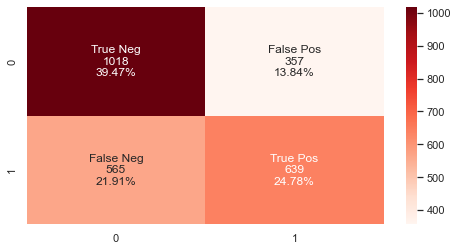

In [39]:
# get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_rf)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(rc={'figure.figsize':(8,4)})
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

## 3.7 Ensemble (Logistic + Random Forest)

In [40]:
estimators = [
     ('lr', clf_lr),
      #LogisticRegression(penalty=clf_lr.best_params_['penalty'], C=clf_lr.best_params_['C'],     
                      #max_iter =clf_lr.best_params_['max_iter'], solver =clf_lr.best_params_['solver'])),
    ('rf', clf_rf)
     #RandomForestClassifier(n_estimators = clf_rf.best_params_['n_estimators'], 
                                #max_features = clf_rf.best_params_['max_features'],
                               # criterion = clf_rf.best_params_['criterion'],
                                #max_depth = clf_rf.best_params_['max_depth']))
 ]

clf_en = StackingClassifier( estimators=estimators)

In [41]:
clf_en.fit(oversample_X_train, oversample_y_train)
# predict 
y_pred_en = clf_en.predict(X_test)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred_en))
print(metrics.classification_report(y_true=y_test, y_pred=y_pred_en))

accuracy:  0.6331911593640946
              precision    recall  f1-score   support

         0.0       0.63      0.77      0.69      1375
         1.0       0.65      0.48      0.55      1204

    accuracy                           0.63      2579
   macro avg       0.64      0.62      0.62      2579
weighted avg       0.64      0.63      0.62      2579



## 4. Feature Importance (optimal model: Random Forest)

In [42]:
#feature_names = [i for i in range(df_x.shape[1])]
feature_names = df_x.columns
clr_rf.fit(X_train, y_train)
importances = clr_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clr_rf.estimators_], axis=0)

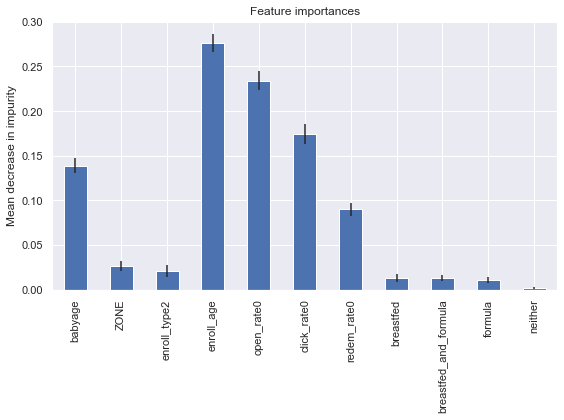

In [43]:
sns.set(rc={'figure.figsize':(8,6)})
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## 5. Save models for deployment

In [44]:
classifiers = {
    "Naive Bayes": clf_nb,
    "Logistic Regression": clf_lr,
    "KNN": clf_knn,
    "Support Vector Classifier": clf_svc,
    "Decision Tree": clf_dt,
    "Random Forest": clf_rf,
    "Ensemble": clf_en
    }

accuracy = []
cf_matrix = dict.fromkeys(classifiers.keys())

for key, classifier in classifiers.items():
    model = classifier.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)

    cf_matrix[key] = confusion_matrix(y_test, y_pred)
    accuracy.append("{:.2f}".format(accuracy_score(y_test, y_pred)))

    # save the model to lcoal storage
    filename = key+".sav"
    pickle.dump(classifier, open(filename, "wb"))